<a href="https://colab.research.google.com/github/novoa123/MachineLearningS07/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("mpg")

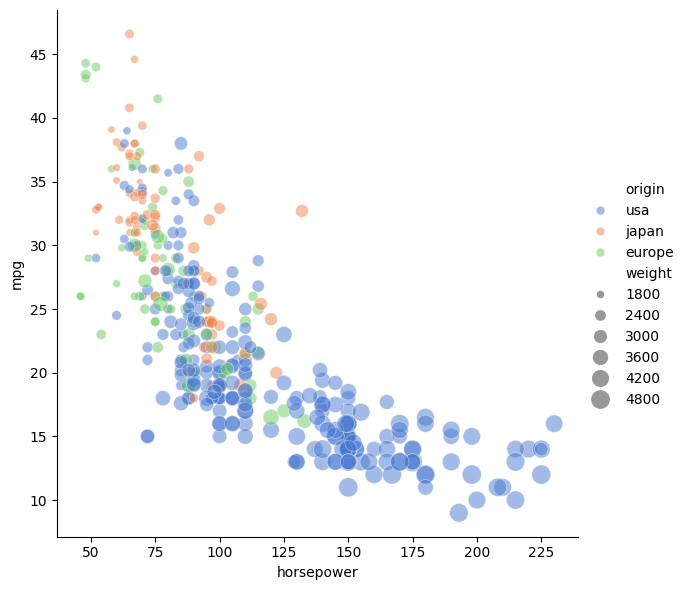

In [5]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(20, 200), alpha=.5, palette="muted",
            height=6, data=df)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

In [6]:
# eliminar nulos
df = df.dropna()

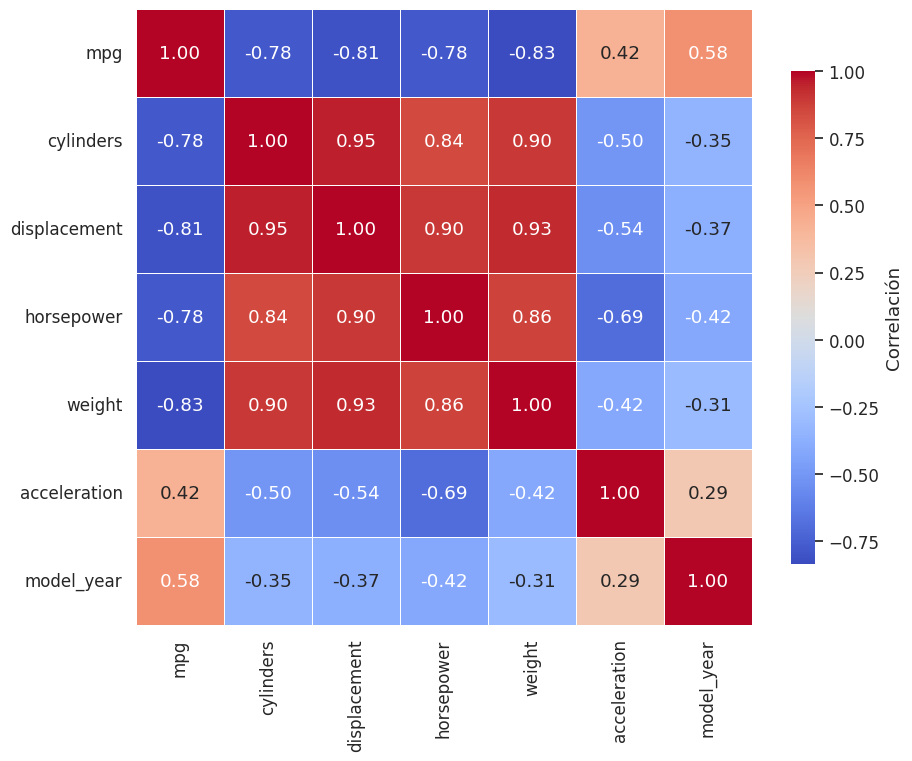

In [7]:
# matriz de correlacion

corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.set_style("white")

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlación"}
)

3) (1 punto) Entrenar un modelo de regresion lineal


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# definir variables
X = df[["horsepower"]]
y = df["mpg"]


In [11]:
# separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.5659681822256185
MSE: 22.153237123863413


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


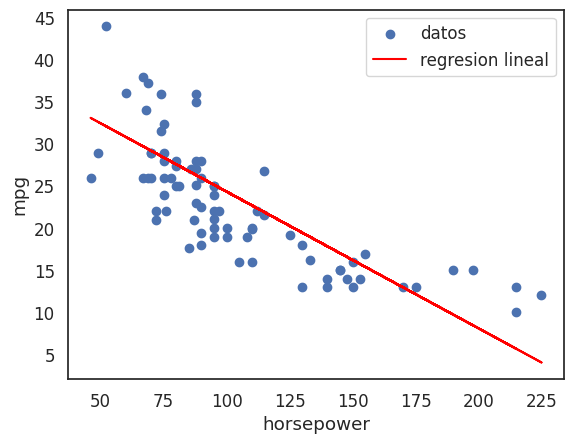

In [17]:
plt.scatter(X_test, y_test, label = "datos")
plt.plot(X_test, y_pred, color="red", label = "regresion lineal")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.legend()
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.